In [56]:
import nltk
from konlpy.tag import Hannanum
import pandas as pd
from time import sleep
import datetime 

In [57]:
import pandas as pd
import numpy as np
import platform

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# font_name = font_manager.FontProperties(fname="/Library/Fonts/AppleGothic.ttf").get_name()
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/MALGUN.TTF").get_name()
rc('font', family=font_name)

plt.rcParams['figure.figsize'] = (10,6)

%matplotlib inline



In [107]:
df = pd.read_csv('work_nouns_stop.csv',encoding='UTF-8')
df.set_index('단어',inplace = True)
del df["Unnamed: 0"] 

df

,빈도
단어,
정책,347
최저임금,344
국민,311
창출,301
반대,266
공무원,263
청년,232
경제,214
대통령,211


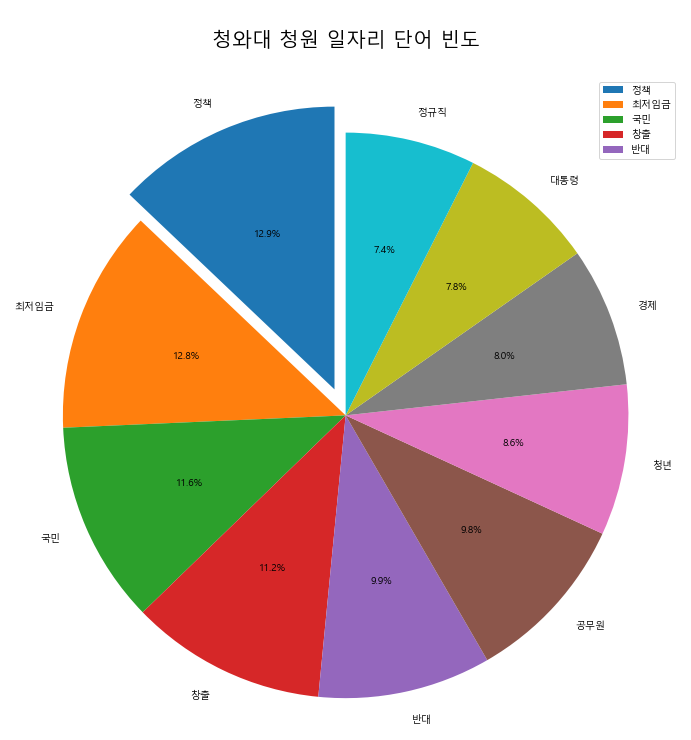

In [108]:
df_blue_job = df[0:10]
df_blue_job

plt.figure(figsize=(12,12))

df_num1 = df_blue_job['빈도']

# len(df_num)
explode = [0.1 if df_num1[i] == df_num1.max() else 0 for i in range(len(df_num1))]

plt.pie(df_num1,
        explode = explode,
        labels = df_num1.index,
        autopct = '%.1f%%',
        shadow = False,
        startangle = 90,)

plt.axis('equal')
plt.legend(df_blue_job.index[:5], loc = 1)
plt.title("\n청와대 청원 일자리 단어 빈도\n", fontsize = 20)
plt.show()



In [109]:
df2 = pd.read_csv('jobcommon.csv',encoding='EUC-KR')
df2.rename(columns={"키워드":"단어"}, inplace = True)
df2.set_index('단어',inplace = True)
del df2["Unnamed: 0"] 
  
df_han_job=df2[0:10]
# type(df_han_job)
df_han_job

,빈도
단어,
고용,58
경제,57
정부,51
최저임금,45
소득,41
사회,41
성장,39
한국,37
난민,32


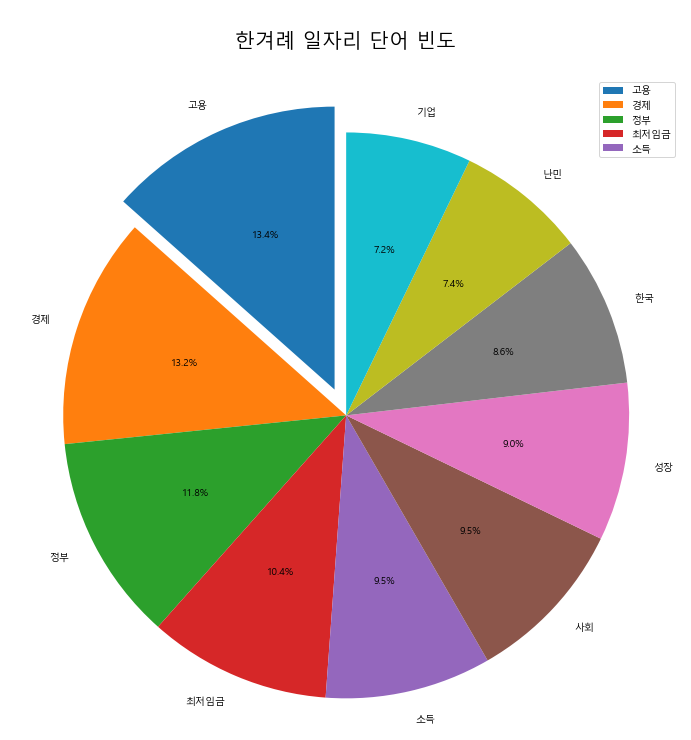

In [110]:
plt.figure(figsize=(12,12))

df_num = df_han_job['빈도']

# len(df_num)
explode = [0.1 if df_num[i] == df_num.max() else 0 for i in range(len(df_num))]

plt.pie(df_num,
        explode = explode,
        labels = df_han_job.index,
        autopct = '%.1f%%',
        shadow = False,
        startangle = 90,)
plt.axis('equal')
plt.legend(df_han_job.index[:5], loc = 1)
plt.title("\n한겨례 일자리 단어 빈도\n", fontsize = 20)
plt.show()
        

In [147]:
df3 = pd.read_csv('cho_emp.csv',encoding='EUC-KR')
df3 = df3.drop(["Unnamed: 0"],1)
df3.columns = ['단어','빈도']
# df3.set_index('단어',inplace=True)
df3 = df3[0:10]
# df3.index
df3

,빈도
단어,
4차,40
산업혁명,34
기업,29
개최,18
세계,17
일자리,17
글로벌,16
대학,16
혁신,15


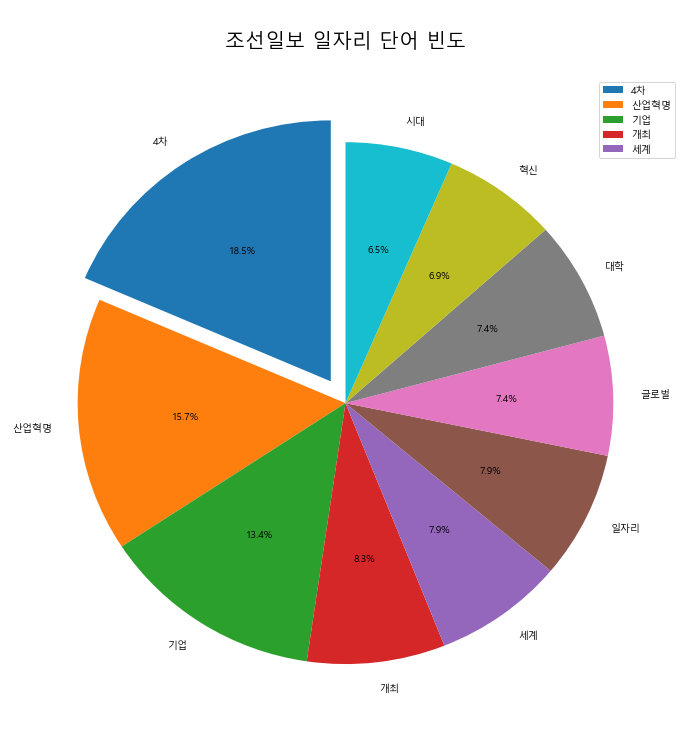

In [148]:
plt.figure(figsize=(12,12))

df_num3 = df3['빈도']

explode = [0.1 if df_num3[i] == df_num3.max() else 0 for i in range(len(df_num3))]

plt.pie(df_num3,
        explode = explode,
        labels=df_num3.index, 
        autopct = '%.1f%%',
        shadow = False,
        startangle = 90,)

plt.legend(df_num3.index[:5],loc = 1)
plt.title("\n조선일보 일자리 단어 빈도\n", fontsize= 20)
plt.show()

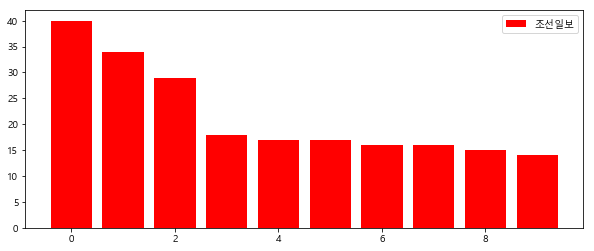

In [120]:
# 조선일보 일자리 빈도 
plt.figure(figsize=(10,4))
plt.bar(df3.index,df3['빈도'],label="조선일보",color = 'r')
plt.legend()

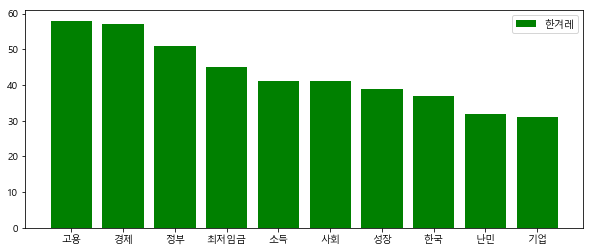

In [134]:
# 한겨레 일자리 단어 빈도 
plt.figure(figsize=(10,4))
plt.bar(df_han_job.index,df_han_job['빈도'],label = '한겨레',color='g')
plt.legend()

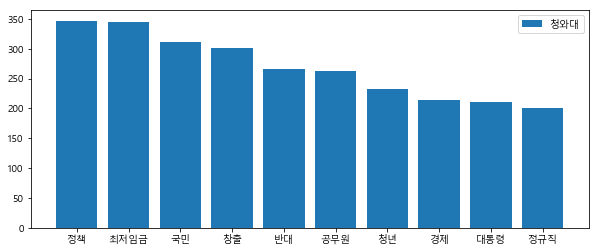

In [154]:
# 청와대 일자리 단어 빈도 
plt.figure(figsize=(10,4))
plt.bar(df_blue_job.index,df_blue_job['빈도'],label="청와대")
plt.legend()

Text(0.5,1,'\n조선일보 일자리 단어 빈도\n')

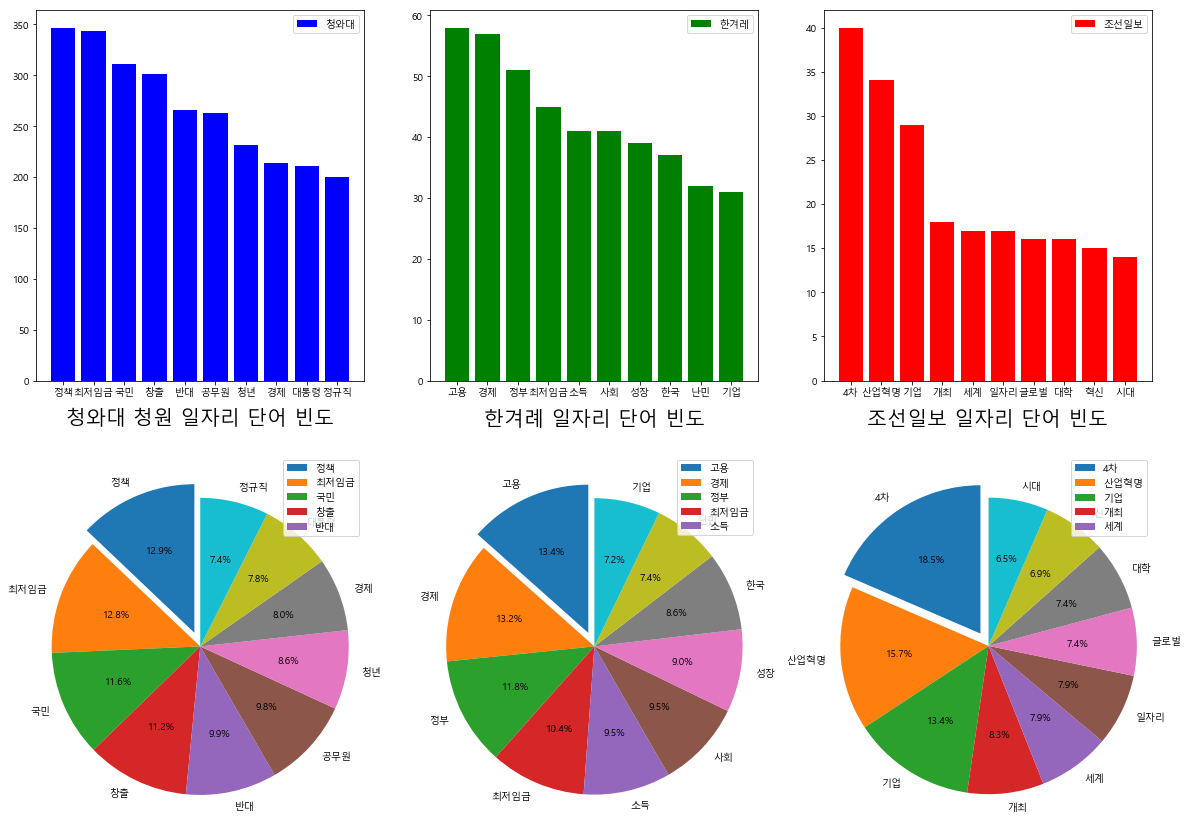

In [166]:
plt.figure(figsize=(20,15))
plt.subplot(231)    
plt.bar(df_blue_job.index,df_blue_job['빈도'],color='b',label='청와대')
plt.legend()
plt.subplot(232) 
plt.bar(df_han_job.index,df_han_job['빈도'],label = '한겨레',color='g')
plt.legend()
plt.subplot(233) 
plt.bar(df3.index,df3['빈도'],label="조선일보",color = 'r')
plt.legend()
plt.subplot(234)
plt.pie(df_num1,
        explode = explode,
        labels = df_num1.index,
        autopct = '%.1f%%',
        shadow = False,
        startangle = 90,)

plt.axis('equal')
plt.legend(df_blue_job.index[:5], loc = 1)

plt.title("\n청와대 청원 일자리 단어 빈도\n", fontsize = 20)

plt.subplot(235)
plt.pie(df_num,
        explode = explode,
        labels = df_han_job.index,
        autopct = '%.1f%%',
        shadow = False,
        startangle = 90,)
plt.axis('equal')
plt.legend(df_han_job.index[:5], loc = 1)
plt.title("\n한겨례 일자리 단어 빈도\n", fontsize = 20)

plt.subplot(236)
plt.pie(df_num3,
        explode = explode,
        labels=df_num3.index, 
        autopct = '%.1f%%',
        shadow = False,
        startangle = 90,)
plt.axis('equal')
plt.legend(df_num3.index[:5],loc = 1)
plt.title("\n조선일보 일자리 단어 빈도\n", fontsize= 20)